In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [2]:
data = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json", lines=True)
y_data = data.is_sarcastic.values
titles = data.headline.values
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
from nltk import word_tokenize

titles_tokenized = []
for title in titles:
    titles_tokenized.append(word_tokenize(title))

In [4]:
titles_an = [] #alphanumeric
for title in titles_tokenized:
    words = [word for word in title if word.isalpha()]
    titles_an.append(words)

In [5]:
titles_an[0]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'over',
 'secret',
 'code',
 'for',
 'minority',
 'shoppers']

In [6]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
titles_preprocessed = []
for title in titles_an:
    stemmed = [porter.stem(word) for word in title]
    titles_preprocessed.append(stemmed)

In [7]:
titles_preprocessed[0]

['former',
 'versac',
 'store',
 'clerk',
 'sue',
 'over',
 'secret',
 'code',
 'for',
 'minor',
 'shopper']

In [8]:
word_list = []

for title in titles_preprocessed:
    for word in title:
        word_list.append(word)

In [9]:
from collections import Counter #Here, we create a counter
freq_list = Counter(word_list)

In [10]:
dictionary = freq_list.most_common(10000)

In [11]:
dictionary = list(zip(*dictionary))[0]

In [12]:
nums = range(0,10000)

In [13]:
word_int = dict(zip(dictionary, nums))

In [14]:
x_data = []

for title in titles_preprocessed:
    x_data.append([word_int[x] for x in title if x in word_int.keys()])

In [15]:
import numpy as np

x = np.array(x_data)
test_data = x[:5000]
train_data = x[5000:]

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

y = np.asarray(y_data).astype('float32')
y_test = y[:5000]
y_train = y[5000:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
x_data = x_train[:5000]
x_half_train = x_train[5000:]

y_data = y_train[:5000]
y_half_train = y_train[5000:]

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(x_half_train, y_half_train, epochs = 25, batch_size = 300, validation_data=(x_data, y_data))


Epoch 1/25
56/56 [==============================] - 4s 58ms/step - loss: 0.0000e+00 - accuracy: 0.4415 - val_loss: 0.0000e+00 - val_accuracy: 0.4516
Epoch 2/25
56/56 [==============================] - 2s 34ms/step - loss: 0.0000e+00 - accuracy: 0.4352 - val_loss: 0.0000e+00 - val_accuracy: 0.4516
Epoch 3/25
56/56 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4376 - val_loss: 0.0000e+00 - val_accuracy: 0.4516
Epoch 4/25
56/56 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.4344 - val_loss: 0.0000e+00 - val_accuracy: 0.4516
Epoch 5/25
56/56 [==============================] - 1s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4403 - val_loss: 0.0000e+00 - val_accuracy: 0.4516
Epoch 6/25
56/56 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - accuracy: 0.4417 - val_loss: 0.0000e+00 - val_accuracy: 0.4516
Epoch 7/25
56/56 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4393 - v

In [19]:
results = model.evaluate(x_test, y_test)
results

157/157 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4374


[0.0, 0.4374000132083893]

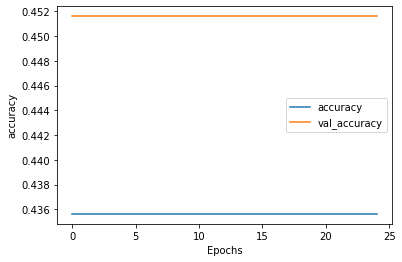

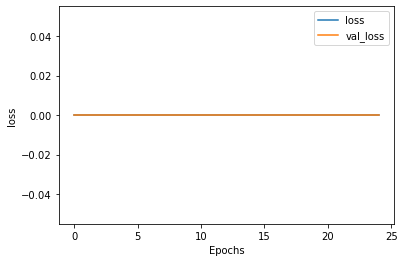

In [20]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(x_half_train, y_half_train, epochs = 25, batch_size = 410, validation_data=(x_data, y_data))


Epoch 1/25
41/41 [==============================] - 2s 35ms/step - loss: 0.6645 - accuracy: 0.4356 - val_loss: 0.5764 - val_accuracy: 0.4516
Epoch 2/25
41/41 [==============================] - 1s 18ms/step - loss: 0.5402 - accuracy: 0.4344 - val_loss: 0.4943 - val_accuracy: 0.4516
Epoch 3/25
41/41 [==============================] - 1s 18ms/step - loss: 0.4344 - accuracy: 0.4361 - val_loss: 0.4252 - val_accuracy: 0.4516
Epoch 4/25
41/41 [==============================] - 1s 18ms/step - loss: 0.3444 - accuracy: 0.4321 - val_loss: 0.3811 - val_accuracy: 0.4516
Epoch 5/25
41/41 [==============================] - 1s 17ms/step - loss: 0.2757 - accuracy: 0.4362 - val_loss: 0.3637 - val_accuracy: 0.4516
Epoch 6/25
41/41 [==============================] - 1s 17ms/step - loss: 0.2341 - accuracy: 0.4328 - val_loss: 0.3629 - val_accuracy: 0.4516
Epoch 7/25
41/41 [==============================] - 1s 17ms/step - loss: 0.2027 - accuracy: 0.4285 - val_loss: 0.3700 - val_accuracy: 0.4516
Epoch 8/25
41

In [23]:
results = model.evaluate(x_test, y_test)
results

157/157 [==============================] - 0s 2ms/step - loss: 0.8036 - accuracy: 0.4374


[0.8036062717437744, 0.4374000132083893]

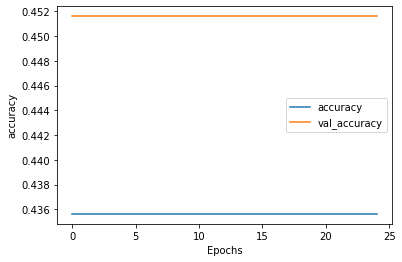

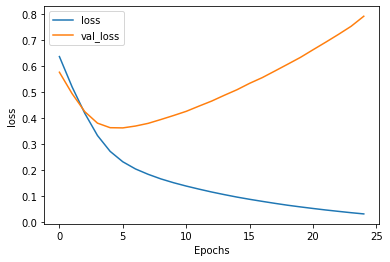

In [24]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:
#Now, let us define our model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(x_half_train, y_half_train, epochs = 20, batch_size = 512, validation_data=(x_data, y_data))


Epoch 1/20
33/33 [==============================] - 2s 40ms/step - loss: 0.6690 - accuracy: 0.6792 - val_loss: 0.5863 - val_accuracy: 0.8226
Epoch 2/20
33/33 [==============================] - 1s 22ms/step - loss: 0.5485 - accuracy: 0.8550 - val_loss: 0.4986 - val_accuracy: 0.8344
Epoch 3/20
33/33 [==============================] - 1s 21ms/step - loss: 0.4457 - accuracy: 0.8834 - val_loss: 0.4311 - val_accuracy: 0.8406
Epoch 4/20
33/33 [==============================] - 1s 21ms/step - loss: 0.3631 - accuracy: 0.8919 - val_loss: 0.3875 - val_accuracy: 0.8468
Epoch 5/20
33/33 [==============================] - 1s 21ms/step - loss: 0.3003 - accuracy: 0.9046 - val_loss: 0.3649 - val_accuracy: 0.8444
Epoch 6/20
33/33 [==============================] - 1s 21ms/step - loss: 0.2582 - accuracy: 0.9125 - val_loss: 0.3574 - val_accuracy: 0.8454
Epoch 7/20
33/33 [==============================] - 1s 21ms/step - loss: 0.2303 - accuracy: 0.9228 - val_loss: 0.3589 - val_accuracy: 0.8456
Epoch 8/20
33

In [27]:
results = model.evaluate(x_test, y_test)
results

157/157 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.8240


[0.5907372236251831, 0.8240000009536743]

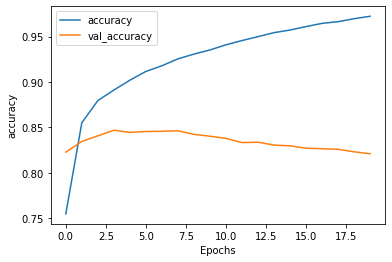

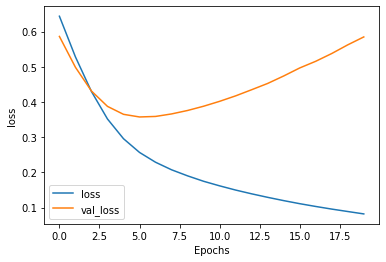

In [28]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [30]:
# Stopwords
stops=stopwords.words("english")

In [31]:
#Create Corpus

corpus=[]

for i in range(data.shape[0]):
    headline = re.sub("[^a-zA-Z]"," ",data["headline"][i] )
    headline=headline.lower()
    headline=headline.split()
    ps=PorterStemmer()
    headline=[ps.stem(word) for word in headline if not word in set(stops)]
    headline='  '.join(headline)
    corpus.append(headline)

In [32]:
corpus

['former  versac  store  clerk  sue  secret  black  code  minor  shopper',
 'roseann  reviv  catch  thorni  polit  mood  better  wors',
 'mom  start  fear  son  web  seri  closest  thing  grandchild',
 'boehner  want  wife  listen  come  altern  debt  reduct  idea',
 'j  k  rowl  wish  snape  happi  birthday  magic  way',
 'advanc  world  women',
 'fascin  case  eat  lab  grown  meat',
 'ceo  send  kid  school  work  compani',
 'top  snake  handler  leav  sink  huckabe  campaign',
 'friday  morn  email  insid  trump  presser  age',
 'airlin  passeng  tackl  man  rush  cockpit  bomb  threat',
 'facebook  reportedli  work  healthcar  featur  app',
 'north  korea  prais  trump  urg  us  voter  reject  dull  hillari',
 'actual  cnn  jeffrey  lord  indefens',
 'barcelona  hold  huge  protest  support  refuge',
 'nuclear  bomb  deton  rehears  spider  man  music',
 'cosbi  lawyer  ask  accus  come  forward  smear  legal  team  year  ago',
 'stock  analyst  confus  frighten  boar  market',
 '

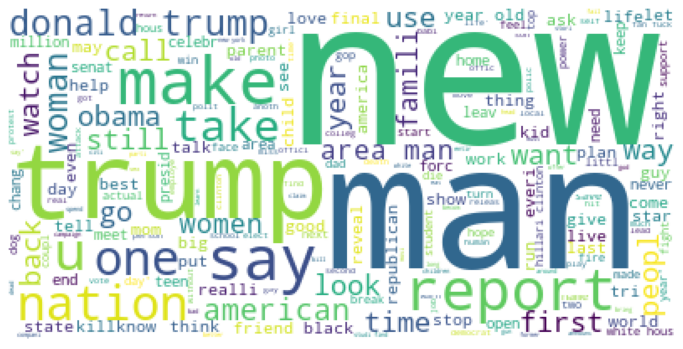

In [33]:
#Check out the generating WordCloud process 
corpus_str=str(corpus)
cloud = WordCloud(relative_scaling = 1.0,background_color = "white").generate(corpus_str)

plt.figure(figsize = (12,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

No of Non-Sarcastic news:  14985
No of Sarcastic news:  11724


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


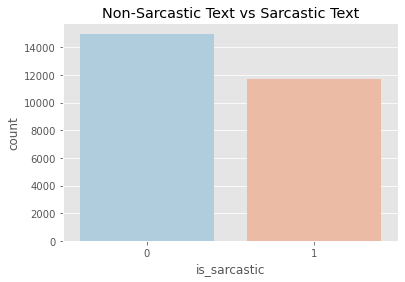

In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import json

#Non-Sarcastic vs Sarcastic
sns.countplot(data['is_sarcastic'],palette="RdBu_r")
plt.title("Non-Sarcastic Text vs Sarcastic Text")
print("No of Non-Sarcastic news: ",data['is_sarcastic'].value_counts()[0])
print("No of Sarcastic news: ",data['is_sarcastic'].value_counts()[1])

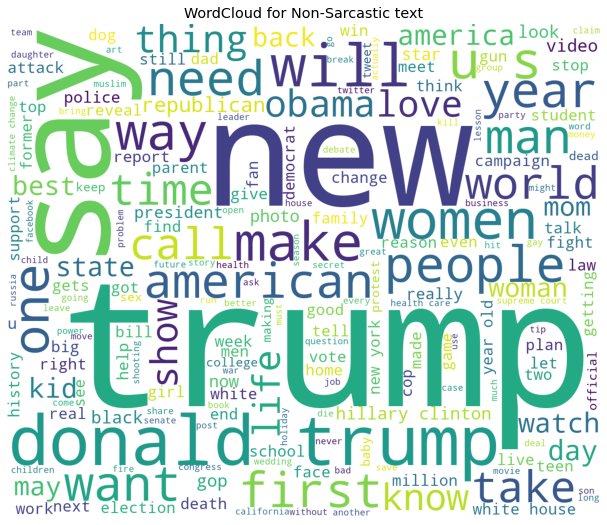

In [35]:
from wordcloud import WordCloud
#We use WordCloud to check recurrent words, related to sarcastic text
fig,ax = plt.subplots(figsize=(12,20))
plt.axis('off')

plt.subplot(2,1,1)
text = " ".join(data[data['is_sarcastic']==0]['headline'])
wordcloud = WordCloud(max_font_size = None,background_color='white',width=1200,height=1000).generate(text)
plt.title("WordCloud for Non-Sarcastic text")
plt.axis('off')
plt.imshow(wordcloud)

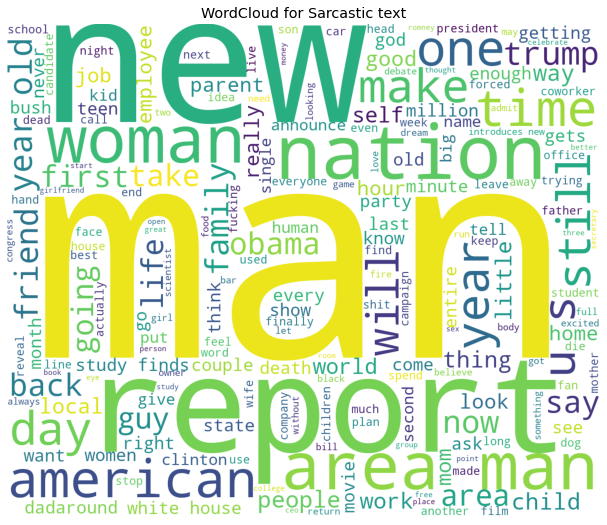

In [36]:
from wordcloud import WordCloud
#We use WordCloud to check recurrent words, related to sarcastic text
fig,ax = plt.subplots(figsize=(12,20))
plt.axis('off')


plt.subplot(2,1,2)
text = " ".join(data[data['is_sarcastic']==1]['headline'])
wordcloud = WordCloud(max_font_size = None,background_color='white',width=1200,height=1000).generate(text)
plt.title("WordCloud for Sarcastic text")
plt.axis('off')
plt.imshow(wordcloud)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Sarcastic Text'}, xlabel='headline', ylabel='Density'>

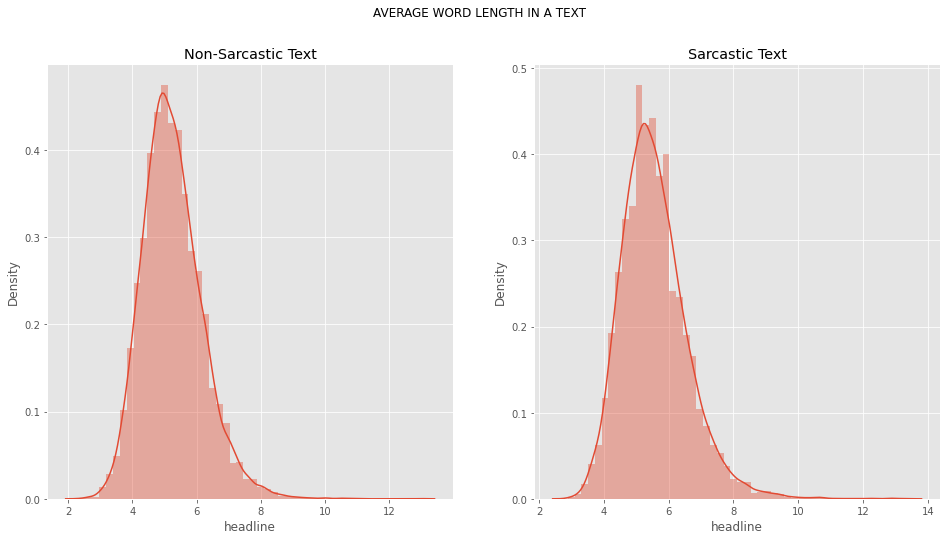

In [37]:
#Check the average of such recurrent words
fig,ax = plt.subplots(figsize=(16,8))
fig.suptitle("AVERAGE WORD LENGTH IN A TEXT")

plt.subplot(1,2,1)
plt.title("Non-Sarcastic Text")
word_length = data[data['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word_length.map(lambda x: np.mean(x)),kde=True)

plt.subplot(1,2,2)
plt.title("Sarcastic Text")
word_length = data[data['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word_length.map(lambda x: np.mean(x)),kde=True)